#Datasets(2 included):
    1. SF County crime report:https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/data
    2. SF COunty rental price(integrety by ourselves): https://docs.google.com/spreadsheets/d/1wD4TUi46MjtxK0k6IaWnD5GFsuGAT7AecVgoMcUKkmI/edit?usp=sharing

In [4]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
#data import and pre-processing
#34 columns and 532,396 rows included
crime_raw = pd.read_csv("/Users/song/Desktop/SF_crime_rate_analysis/Police_Department_Incident_Reports__2018_to_Present.csv")
crime_rawDF = pd.DataFrame(crime_raw)
pd.set_option('max_columns', None)

crime_rawDF.head()
#crime_rawDF.columns
#crime_rawDF.info()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2019/03/05 09:00:00 PM,2019/03/05,21:00,2019,Tuesday,2019/03/07 12:54:00 PM,77808706372,778087,196048512,NaN,II,Coplogic Initial,True,6372,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, $50-$200",Open or Active,UNITED NATIONS PLZ \ LEAVENWORTH ST,30044000.0,Tenderloin,Tenderloin,6.0,37.779992,-122.413487,POINT (-122.41348740024354 37.77999173926721),21.0,NaN,1.0,1.0,1.0,NaN,10.0,5.0
1,2018/12/22 12:00:00 PM,2018/12/22,12:00,2018,Saturday,2018/12/26 02:29:00 PM,75246907023,752469,180971777,183601903.0,VI,Vehicle Initial,NaN,7023,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Motorcycle",Open or Active,LINDEN ST \ BUCHANAN ST,25931000.0,Northern,Hayes Valley,5.0,37.775787,-122.427819,POINT (-122.42781910073226 37.77578657487239),22.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0
2,2018/08/24 05:30:00 PM,2018/08/24,17:30,2018,Friday,2018/08/24 07:35:00 PM,70675306243,706753,180639339,182363732.0,II,Initial,NaN,6243,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",Open or Active,PERU AVE \ BURROWS ST,21610000.0,Ingleside,Excelsior,9.0,37.723944,-122.422830,POINT (-122.42283006837721 37.72394419349765),90.0,NaN,NaN,NaN,NaN,NaN,2.0,9.0
3,2018/10/20 03:10:00 PM,2018/10/20,15:10,2018,Saturday,2018/10/20 03:10:00 PM,72826462071,728264,180624631,182933454.0,IS,Initial Supplement,NaN,62071,Warrant,Other,Probation Search,Cite or Arrest Adult,BOARDMAN PL \ BRYANT ST,23914000.0,Southern,South of Market,6.0,37.775161,-122.403636,POINT (-122.40363551943442 37.7751608100771),32.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0
4,2019/06/05 12:36:00 AM,2019/06/05,00:36,2019,Wednesday,2019/06/05 12:37:00 AM,80823030140,808230,190403077,191560061.0,II,Initial,NaN,30140,Other Offenses,Other,"Air Gun, Possession",Cite or Arrest Adult,LOMBARD ST \ NEWELL ST,30035000.0,Central,North Beach,3.0,37.802755,-122.413623,POINT (-122.4136227157606 37.80275505740129),106.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [12]:
#column selection for crime analysis 
crime_selected = crime_rawDF.loc[:,['Row ID','Incident Datetime','Incident Date','Incident Year',
                                    'Incident Day of Week','Incident Category','Intersection',
                                    'Resolution','Police District','Analysis Neighborhood']]
#crime_selected.head()
#crime_selected.info()

In [13]:
#Data cleaning and processing
#Dealing with missing data - dropna
#Dealing with missing data: 532396 - 504592 = 27804
#27804/532396 = 5.2% data has been dropped

#rename column name, replace blank space by underscore for later groupby operations

cleaned_crime = crime_selected.dropna(axis = 0)
cleaned_crime.columns = cleaned_crime.columns.str.replace(' ', '_')

#extract month from datetime and set it as a new column
date_conversion = pd.to_datetime(cleaned_crime.loc[:,'Incident_Date'] )
cleaned_crime['Month'] = date_conversion.dt.month

#extract hours from datetime and set it as a new column
cleaned_crime['Hours'] = pd.to_datetime(cleaned_crime['Incident_Datetime'],format='%Y/%m/%d %I:%M:%S %p', errors='coerce').dt.hour
# input_data = pd.to_datetime(cleaned_crime['Incident_Datetime'],format='%Y/%m/%d %H:%M:%S %p', errors='coerce')
#cleaned_crime

#select a 
start_date = '2018/01/01'
end_date = '2021/11/30'
mask = (cleaned_crime['Incident_Date'] > start_date) & (cleaned_crime['Incident_Date'] <= end_date)
cleaned_crime = cleaned_crime.loc[mask]
#cleaned_crime
cleaned_crime.info()


<ipython-input-13-91c77c67e6f2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_crime['Month'] = date_conversion.dt.month


<class 'pandas.core.frame.DataFrame'>
Int64Index: 503702 entries, 0 to 532395
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Row_ID                 503702 non-null  int64 
 1   Incident_Datetime      503702 non-null  object
 2   Incident_Date          503702 non-null  object
 3   Incident_Year          503702 non-null  int64 
 4   Incident_Day_of_Week   503702 non-null  object
 5   Incident_Category      503702 non-null  object
 6   Intersection           503702 non-null  object
 7   Resolution             503702 non-null  object
 8   Police_District        503702 non-null  object
 9   Analysis_Neighborhood  503702 non-null  object
 10  Month                  503702 non-null  int64 
 11  Hours                  503702 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 50.0+ MB


<ipython-input-13-91c77c67e6f2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_crime['Hours'] = pd.to_datetime(cleaned_crime['Incident_Datetime'],format='%Y/%m/%d %I:%M:%S %p', errors='coerce').dt.hour


In [10]:
cleaned_crime.head()

,Row_ID,Incident_Datetime,Incident_Date,Incident_Year,Incident_Day_of_Week,Incident_Category,Resolution,Police_District,Analysis_Neighborhood,Month,Hours
0,77808706372,2019/03/05 09:00:00 PM,2019/03/05,2019,Tuesday,Larceny Theft,Open or Active,Tenderloin,Tenderloin,3,21
1,75246907023,2018/12/22 12:00:00 PM,2018/12/22,2018,Saturday,Motor Vehicle Theft,Open or Active,Northern,Hayes Valley,12,12
2,70675306243,2018/08/24 05:30:00 PM,2018/08/24,2018,Friday,Larceny Theft,Open or Active,Ingleside,Excelsior,8,17
3,72826462071,2018/10/20 03:10:00 PM,2018/10/20,2018,Saturday,Warrant,Cite or Arrest Adult,Southern,South of Market,10,15
4,80823030140,2019/06/05 12:36:00 AM,2019/06/05,2019,Wednesday,Other Offenses,Cite or Arrest Adult,Central,North Beach,6,0


Text(0, 0.5, 'Number of Crimes')

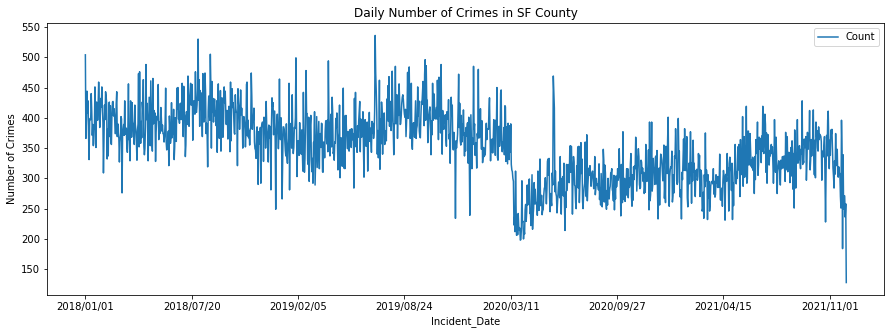

In [310]:
#time series chart, y-axis stands for number of crimes
ts_crime = cleaned_crime.groupby('Incident_Date').count().sort_values(by=['Incident_Date'],ascending=True).reset_index().rename(columns={'Row_ID': 'Count'})
ts_crime_sum = ts_crime.loc[:,['Incident_Date','Count']]
ts_crime_sum.plot('Incident_Date','Count', kind = 'line',figsize = (15,5),title = 'Daily Number of Crimes in SF County')
plt.ylabel('Number of Crimes')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'Northern'),
  Text(2, 0, 'Mission'),
  Text(3, 0, 'Southern'),
  Text(4, 0, 'Tenderloin'),
  Text(5, 0, 'Bayview'),
  Text(6, 0, 'Ingleside'),
  Text(7, 0, 'Taraval'),
  Text(8, 0, 'Richmond'),
  Text(9, 0, 'Park')])

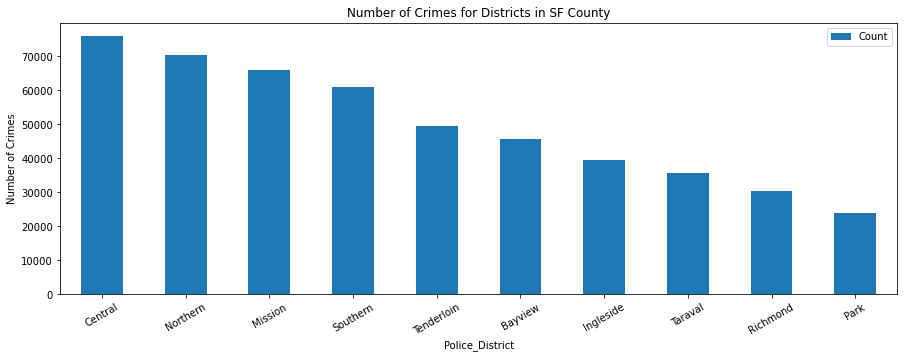

In [311]:
#analyze crimes by districts
crime_by_district = cleaned_crime.query("Police_District != 'Out of SF'").groupby('Police_District').count().sort_values(by=['Row_ID'],ascending=False).reset_index().reset_index().rename(columns={'Row_ID': 'Count'})
crime_by_district_sum = crime_by_district.loc[:,['Police_District','Count']]

crime_by_district_sum.plot('Police_District','Count', kind = 'bar',figsize = (15,5),title = 'Number of Crimes for Districts in SF County')
plt.ylabel('Number of Crimes')


plt.xticks(rotation=30)

In [312]:
# crime_by_district = cleaned_crime.groupby('Analysis_Neighborhood').count().sort_values(by=['Row_ID'],ascending=False).reset_index().reset_index().rename(columns={'Row_ID': 'Count'})
# crime_by_district_sum = crime_by_district.loc[:,['Analysis_Neighborhood','Count']]
# crime_by_district_sum
#crime_by_district_sum.plot('Analysis_Neighborhood','Count', kind = 'bar',figsize = (15,5),title = 'Number of Crimes for Analysis_Neighborhood in SF County')

Text(0, 0.5, 'Number of Crimes')

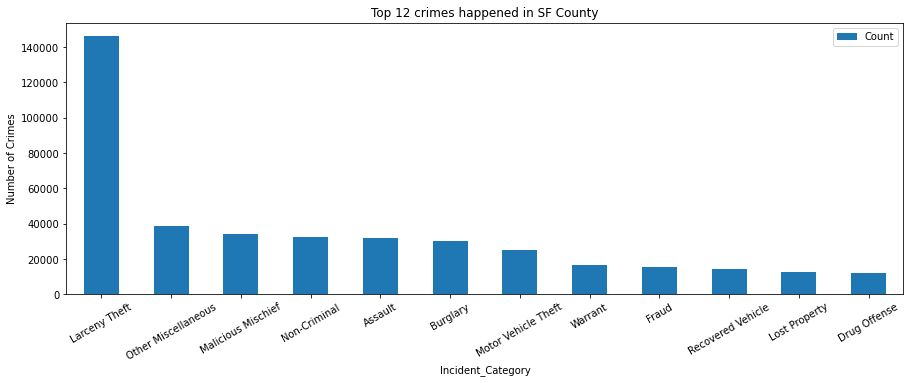

In [314]:
#group by crime category and select the top 12
crime_by_category = cleaned_crime.groupby('Incident_Category').count().sort_values(by=['Row_ID'],ascending=False).nlargest(12,'Row_ID').reset_index().rename(columns={'Row_ID': 'Count'})
crime_by_category_count= crime_by_category.loc[:,['Incident_Category','Count']]
crime_by_category_count.plot('Incident_Category','Count', kind = 'bar',figsize = (15,5),title = 'Top 12 crimes happened in SF County')
plt.xticks(rotation=30)
plt.ylabel('Number of Crimes')
# crime_by_category_count
#plt.bar(Incident_Category)

Text(0, 0.5, 'Number of Crimes')

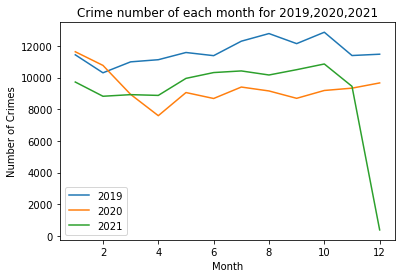

In [330]:
#the number of crime in each month of 2018,2019,2020,2021
#data for December in 2021 is not fully recorded, since today is Dec.18,2021, then there is an obvious drop
crime_by_month = cleaned_crime.groupby(['Incident_Year','Month']).count().sort_values(by=['Row_ID'],ascending=False).reset_index()

compare_by_month= crime_by_month.loc[:,['Incident_Year','Month','Row_ID']]
compare_by_month = compare_by_month.rename(columns={'Row_ID': 'Count'})
data_2018 = compare_by_month.query("Incident_Year == 2018").sort_values(by=['Month'],ascending=True)[['Month', 'Count']].rename(columns={'Count': '2018'})
data_2019 = compare_by_month.query("Incident_Year == 2019").sort_values(by=['Month'],ascending=True)[['Month', 'Count']].rename(columns={'Count': '2019'})
data_2020 = compare_by_month.query("Incident_Year == 2020").sort_values(by=['Month'],ascending=True)[['Month', 'Count']].rename(columns={'Count': '2020'})
data_2021 = compare_by_month.query("Incident_Year == 2021").sort_values(by=['Month'],ascending=True)[['Month', 'Count']].rename(columns={'Count': '2021'})

compare_by_month = data_2018.set_index('Month').join(data_2019.set_index('Month')).join(data_2020.set_index('Month').join(data_2021.set_index('Month'))).reset_index()

# crime_by_category_count.plot('Incident_Year','Row_ID', kind = 'bar',figsize = (15,5),title = 'Top 10 crimes happened in SF County')
compare_by_month.plot(x="Month", y=[ "2019", "2020", "2021"], title = "Crime number of each month for 2019,2020,2021", kind="line")
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

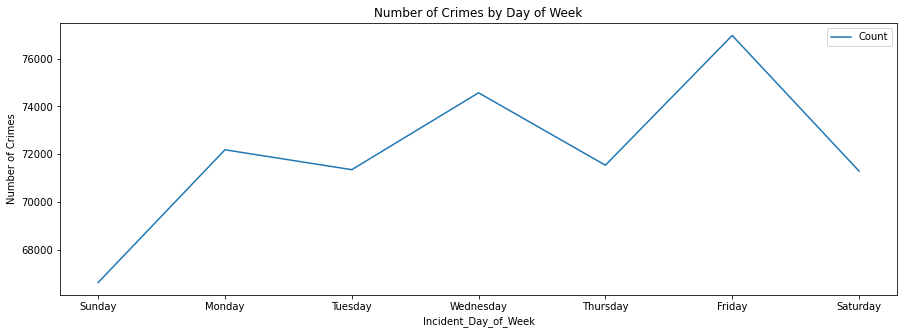

In [332]:
#crimes happened on which day of the week
crime_by_dayOfWeek = cleaned_crime.groupby('Incident_Day_of_Week').count().reset_index()
crime_by_dayOfWeek_count= crime_by_dayOfWeek.loc[:,['Incident_Day_of_Week','Row_ID']]
crime_by_dayOfWeek_count = crime_by_dayOfWeek_count.set_index('Incident_Day_of_Week').reindex(['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']).reset_index().rename(columns={'Row_ID': 'Count'})

crime_by_dayOfWeek_count.plot('Incident_Day_of_Week','Count', kind = 'line',figsize = (15,5),title = 'Number of Crimes by Day of Week')

#crime_by_dayOfWeek_count.Incident_Day_of_Week.reindex(['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']).plot(kind='line')

#Friday has the highest number of crimes, and Sunday has the lowest(Police station may not take records for crimes on that day)
plt.ylabel('Number of Crimes')


Text(0, 0.5, 'Number of Crimes')

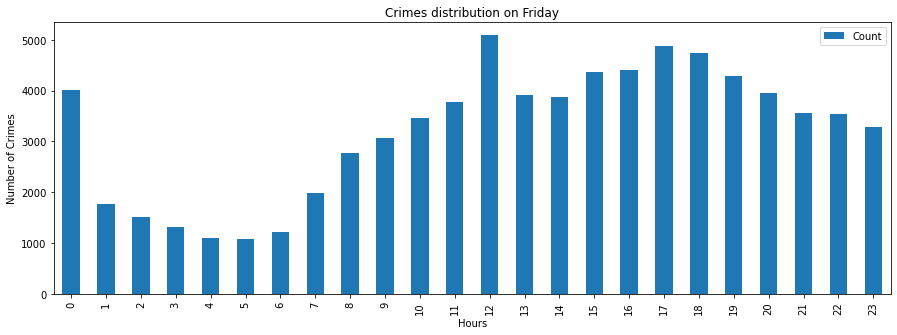

In [333]:
#Friday is the date that has the highest numbe of crimes
#when is the dangerous time on Friday?
crime_by_timeOfWeek = cleaned_crime.groupby(['Incident_Day_of_Week','Hours']).count().reset_index()
crime_by_timeOfWeek_index = crime_by_timeOfWeek.set_index('Incident_Day_of_Week')
# crime_by_timeOfWeek["Incident_Day_of_Week"] == "Friday"
crime_on_friday = crime_by_timeOfWeek_index.loc[["Friday"]].rename(columns={'Row_ID': 'Count'})
crime_on_friday.plot('Hours','Count', kind = 'bar',figsize = (15,5),title = 'Crimes distribution on Friday')
plt.ylabel('Number of Crimes')
#crime_by_timeOfWeek_count = crime_by_timeOfWeek.loc[:,[crime_by_timeOfWeek["Incident_Day_of_Week"] == "Friday"],'Row_ID'].rename(columns={'Row_ID': 'Count'})

#crimes happened a lot at 12pm and after 5pm is the time slots 


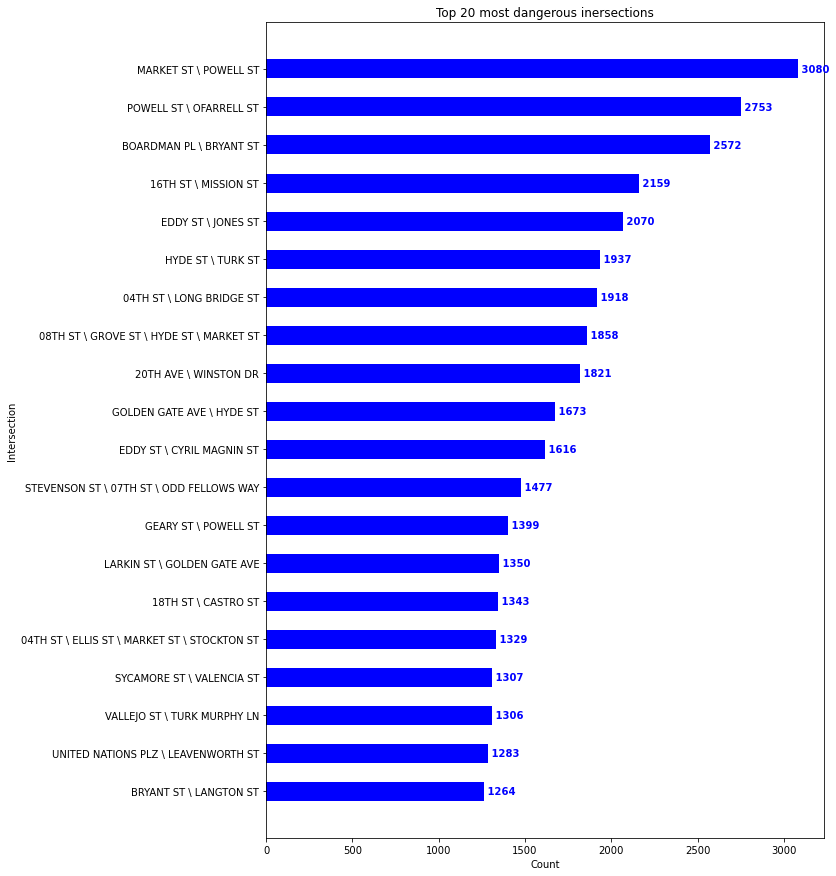

In [14]:
#Draw the bar chart representing the top 20 most dangerous intersections
crime_by_intersection = cleaned_crime.groupby('Intersection').count().sort_values(by=['Row_ID'],ascending=False).reset_index().reset_index().rename(columns={'Row_ID': 'Count'})
crime_by_intersection_sum = crime_by_intersection.loc[:,['Intersection','Count']]
intersection = crime_by_intersection_sum.Intersection[0:20][::-1]
count = crime_by_intersection_sum.Count[:20][::-1]
plt.figure(figsize=(10,15))
plt.barh(intersection,count, height=0.5, color = 'b')
plt.title('Top 20 most dangerous inersections')
plt.xlabel('Count')
plt.ylabel('Intersection')
for i, v in enumerate(count):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

In [16]:
#!conda install -c conda-forge geoplot

In [18]:
# import geoplot as gplt
# import geopandas as gpd
# import geoplot.crs as gcrs

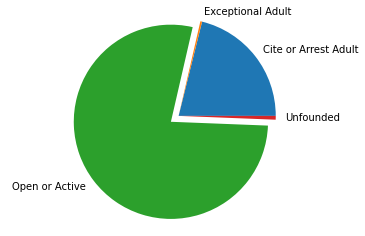

In [16]:
crime_resolution = cleaned_crime.groupby('Resolution').count().reset_index().rename(columns={'Row_ID': 'Count'})
crime_resolution_count= crime_resolution.loc[:,['Resolution','Count']]
#crime_resolution_count
resolution = crime_resolution_count.Resolution
count = crime_resolution_count.Count
Explode = [0, 0, 0.1, 0]
plt.pie(count, explode = Explode, labels=resolution)
plt.axis('equal') 
plt.show()

#the overall resolution for crimes reports is not 

In [319]:
crime_resolution_by_category = cleaned_crime.groupby(['Incident_Category','Resolution']).count().reset_index().rename(columns={'Row_ID': 'Count'})
crime_resolution_by_category_count = crime_resolution_by_category.loc[:,['Incident_Category','Resolution','Count']]
crime_resolution_by_category_count.groupby('Incident_Category').sum().reset_index().sort_values(by=['Count'],ascending=False)

crime_resolution_by_category_count

,Incident_Category,Resolution,Count
0,Arson,Cite or Arrest Adult,342
1,Arson,Exceptional Adult,10
2,Arson,Open or Active,1165
3,Arson,Unfounded,8
4,Assault,Cite or Arrest Adult,9609
...,...,...,...
164,Weapons Offence,Open or Active,1
165,Weapons Offense,Cite or Arrest Adult,1298
166,Weapons Offense,Exceptional Adult,2
167,Weapons Offense,Open or Active,2137


In [117]:
#break down  the resolution by categories, 
fig = plt.figure(figsize=(24,10), dpi=800)
Larceny_Theft_count = crime_resolution_by_category_count.query("Incident_Category == 'Larceny Theft'")
ax1 = plt.subplot2grid((3,4),(0,0))
plt.pie(Larceny_Theft_count.Count, labels=Larceny_Theft_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Larceny_Theft')

Other_Miscellaneous_count = crime_resolution_by_category_count.query("Incident_Category == 'Other Miscellaneous'")
ax1 = plt.subplot2grid((3,4), (0, 1))
plt.pie(Other_Miscellaneous_count.Count, labels=Other_Miscellaneous_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Other_Miscellaneous')

Malicious_Mischief_count = crime_resolution_by_category_count.query("Incident_Category == 'Malicious Mischief'")
ax1 = plt.subplot2grid((3,4), (0, 2))
plt.pie(Malicious_Mischief_count.Count, labels=Malicious_Mischief_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Malicious_Mischief')

Non_Criminal_count = crime_resolution_by_category_count.query("Incident_Category == 'Non-Criminal'")
ax1 = plt.subplot2grid((3,4), (0, 3))
plt.pie(Non_Criminal_count.Count, labels=Non_Criminal_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Non_Criminal')

Assault_count = crime_resolution_by_category_count.query("Incident_Category == 'Assault'")
ax1 = plt.subplot2grid((3,4),(1,0))
plt.pie(Assault_count.Count, labels=Assault_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Assault')

Burglary_count = crime_resolution_by_category_count.query("Incident_Category == 'Burglary'")
ax1 = plt.subplot2grid((3,4), (1, 1))
plt.pie(Burglary_count.Count, labels=Burglary_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Burglary')

Motor_Vehicle_Theft_count = crime_resolution_by_category_count.query("Incident_Category == 'Motor Vehicle Theft'")
ax1 = plt.subplot2grid((3,4), (1, 2))
plt.pie(Motor_Vehicle_Theft_count.Count, labels=Motor_Vehicle_Theft_count.Resolution, explode= (0.1, 0.1, 0.1, 0.1) , autopct='%1.1f%%')

plt.title('Motor_Vehicle_Theft')

Warrant_count = crime_resolution_by_category_count.query("Incident_Category == 'Warrant'")
ax1 = plt.subplot2grid((3,4), (1, 3))
plt.pie(Warrant_count.Count, labels=Warrant_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Warrant')

Fraud_count = crime_resolution_by_category_count.query("Incident_Category == 'Fraud'")
ax1 = plt.subplot2grid((3,4), (2, 0))
plt.pie(Fraud_count.Count, labels=Fraud_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Fraud')

Recovered_Vehicle_count = crime_resolution_by_category_count.query("Incident_Category == 'Recovered Vehicle'")
ax1 = plt.subplot2grid((3,4), (2, 1))
plt.pie(Recovered_Vehicle_count.Count, labels=Recovered_Vehicle_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Recovered_Vehicle')

Lost_Property_count = crime_resolution_by_category_count.query("Incident_Category == 'Lost Property'")
ax1 = plt.subplot2grid((3,4), (2, 2))
plt.pie(Lost_Property_count.Count, labels=Lost_Property_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Lost_Property')

Drug_Offense_count = crime_resolution_by_category_count.query("Incident_Category == 'Drug Offense'")
ax1 = plt.subplot2grid((3,4), (2, 3))
plt.pie(Drug_Offense_count.Count, labels=Drug_Offense_count.Resolution, explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')
plt.title('Drug_Offense')

# most categories have nore than 80% unresolved rate, only warrant and drug offense and miscellaneous are having a higher resolve rate



Text(0.5, 1.0, 'Drug_Offense')

In [345]:
rent_2019 = pd.read_csv('/Users/song/Desktop/NEU/DAMG6105/Rental Cafe - 2019.csv')
rent_2020 = pd.read_csv('/Users/song/Desktop/NEU/DAMG6105/Rental Cafe - 2020.csv')
rent_2021 = pd.read_csv('/Users/song/Desktop/NEU/DAMG6105/Rental Cafe - 2021.csv')

rent_2019 = rent_2019.replace(r'[$]', '', regex=True)
rent_2019 = rent_2019.replace(r'[,]', '', regex=True)
rent_2019[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct','Nov', 'Dec']] = rent_2019[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']].astype(int)

rent_2020 = rent_2020.replace(r'[$]', '', regex=True)
rent_2020 = rent_2020.replace(r'[,]', '', regex=True)
rent_2020[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct','Nov', 'Dec']] = rent_2020[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']].astype(int)

rent_2021 = rent_2021.replace(r'[$]', '', regex=True)
rent_2021 = rent_2021.replace(r'[,]', '', regex=True)
rent_2021[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct','Nov', 'Dec']] = rent_2021[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']].astype(int)

rent_2021
           

,Location,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,Bayview,2739,2739,2739,2653,2653,2653,2762,2762,2762,2762,2762,2762
1,Bernal Heights,3013,3013,3013,2874,2874,2874,2963,2963,2963,2963,2963,2963
2,Buena Vista,3400,3400,3400,3094,3094,3094,3348,3348,3348,3348,3348,3348
3,Downtown District 8 - North East,2604,2604,2604,2388,2388,2388,2437,2437,2437,2437,2437,2437
4,Eureka Valley - Dolores Heights,3519,3519,3519,3205,3205,3205,3442,3442,3442,3442,3442,3442
5,Excelsior,3360,3360,3360,3094,3094,3094,3339,3339,3339,3339,3339,3339
6,Financial District - Barbary Coast,2996,2996,2996,2822,2822,2822,2963,2963,2963,2963,2963,2963
7,Forest Knolls,3213,3213,3213,3019,3019,3019,3121,3121,3121,3121,3121,3121
8,Glen Park,3129,3129,3129,3017,3017,3017,3049,3049,3049,3049,3049,3049
9,Golden Gate Heights,2900,2900,2900,2813,2813,2813,2947,2947,2947,2947,2947,2947


In [75]:
ja_2019 = rent_2019[['Location','Jan','Feb','Mar','Apr', 'May', 'June', "July", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
price2019 = ja_2019.drop('Location', axis=1).apply(lambda x: x.mean(), axis=1)
n2019 = rent_2019['Location']
 
ja_2020 = rent_2020[['Location','Jan','Feb','Mar','Apr', 'May', 'June', "July", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
price2020 = ja_2020.drop('Location', axis=1).apply(lambda x: x.mean(), axis=1)
n2020 = rent_2020['Location']

ja_2021 = rent_2021[['Location','Jan','Feb','Mar','Apr', 'May', 'June', "July", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
price2021 = ja_2021.drop('Location', axis=1).apply(lambda x: x.mean(), axis=1)
n2021 = rent_2021['Location']

In [83]:
r2019 = pd.Series(price2019)
r2020 = pd.Series(price2020)
r2021 = pd.Series(price2021)
data = {"Location":n2019,
    "2019": r2019,
        "2020": r2020,
        "2021": r2021}
df_3year = pd.concat(data,axis = 1)
df_3year['mean'] = df_3year.mean(axis=1)
dfTop5 = df_3year.sort_values("mean")[::-1][:5]

In [171]:
df = crime_rawDF
df.columns = df.columns.str.replace(' ', '_')
df2018 = df[df['Incident_Date'].str.contains('2018')]
df2018 = df2018[df2018['Analysis_Neighborhood'].notna()]
df2018 = df2018.groupby('Analysis_Neighborhood').count().reset_index().rename(columns={'Row_ID':'Count_2018'})
col_list = ['Analysis_Neighborhood','Count_2018']
df2018 = df2018[col_list]


df2019 = df[df['Incident_Date'].str.contains('2019')]
df2019 = df2019[df2019['Analysis_Neighborhood'].notna()]
df2019 = df2019.groupby('Analysis_Neighborhood').count().reset_index().rename(columns={'Row_ID':'Count_2019'})
col_list = ['Analysis_Neighborhood','Count_2019']
df2019 = df2019[col_list]

df2020 = df[df['Incident_Date'].str.contains('2020')]
df2020 = df2020[df2020['Analysis_Neighborhood'].notna()]
df2020 = df2020.groupby('Analysis_Neighborhood').count().reset_index().rename(columns={'Row_ID':'Count_2020'})
col_list = ['Analysis_Neighborhood','Count_2020']
df2020 = df2020[col_list]

df2021 = df[df['Incident_Date'].str.contains('2021')]
df2021 = df2021[df2021['Analysis_Neighborhood'].notna()]
df2021 = df2021.groupby('Analysis_Neighborhood').count().reset_index().rename(columns={'Row_ID':'Count_2021'})
col_list = ['Analysis_Neighborhood','Count_2021']
df2021 = df2021[col_list]


In [ ]:
# The average price of all neighborhoods from Jan to December (3 lines indicate 3 years separately)

Text(0.5, 1.0, 'Rental Price of each month for 2019,2020,2021')

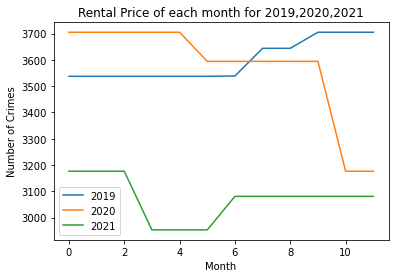

In [339]:
average_month_rent_2019 = rent_2019[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct','Nov', 'Dec']].mean().values
average_month_rent_2020 = rent_2020[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct','Nov', 'Dec']].mean().values
average_month_rent_2021 = rent_2021[['Jan','Feb','Mar','Apr', 'May', 'June', 'July', 'Aug','Sep', 'Oct','Nov', 'Dec']].mean().values
month = ['Jan','Feb','Mar','Apr', 'May', 'June', "July", 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = {'Month':month,
        '2019':average_month_rent_2019,
       '2020': average_month_rent_2020,
       '2021': average_month_rent_2021}
df = pd.DataFrame(data)
df.plot()
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.title('Rental Price of each month for 2019,2020,2021')



In [329]:
merge1 =pd.merge(df2019,df2020,on='Analysis_Neighborhood')
merge1 = pd.merge(merge,df2021,on='Analysis_Neighborhood')
merge1 = merge1.drop(columns=['Count_2021_y']).rename(columns={'Count_2021_x':'Count_2021'})
#merge1

In [ ]:
# 5 neighborhoods that have the highest rental price (3-year average), and their price from 2019-2021

,Analysis_Neighborhood,2019,2020,2021,mean
31,Presidio,4868.166667,4893.250000,4774.5,4845.305556
4,Eureka Valley - Dolores Heights,4411.583333,4303.583333,3402.0,4039.055556
21,Mission Bay,4506.000000,4276.583333,3333.0,4038.527778
29,Portola,4238.583333,4096.916667,3589.5,3975.000000
37,Visitacion Valley,4238.583333,4096.916667,3537.0,3957.500000
16,John McLaren Park,4009.833333,3949.333333,3380.5,3779.888889
14,Inner Richmond,3871.000000,3856.500000,3432.5,3720.000000


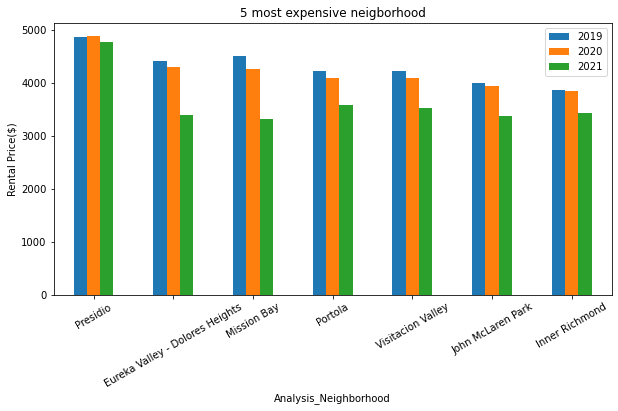

In [337]:
df_top5 = df_3year.sort_values('mean',ascending = False)[:7].rename(columns = {'Location':'Analysis_Neighborhood'})
df_bottom5 = df_3year.sort_values('mean',ascending = True)[:6].rename(columns = {'Location':'Analysis_Neighborhood'})
df_top5.plot (x = "Analysis_Neighborhood", y = ["2019", "2020", "2021"], title = "5 most expensive neigborhood", kind = "bar", figsize = (10,5))
plt.xticks(rotation = 30)
plt.ylabel('Rental Price($)')

df_top5


In [ ]:
# 5 neighborhoods that have the lowest rental price (3-year average), and their price from 2019-2021

Text(0, 0.5, 'Rental Price($)')

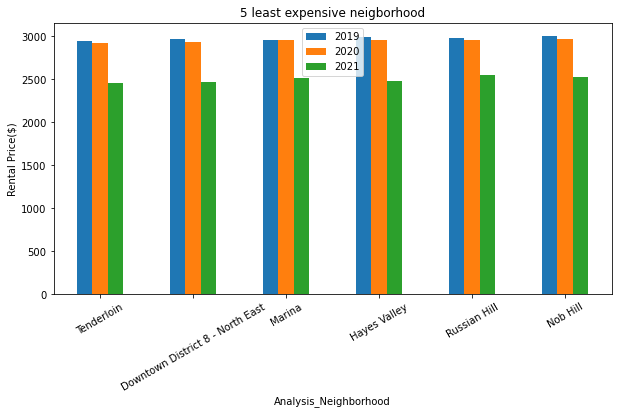

In [338]:
df_bottom5.plot (x = "Analysis_Neighborhood", y = ["2019", "2020", "2021"], title = "5 least expensive neigborhood", kind = "bar", figsize = (10,5))
plt.xticks(rotation = 30)
df_bottom5
plt.ylabel('Rental Price($)')


In [ ]:
#correlation between average yearly rental price and crime count(mainly focus on 5 highest and lowest neighborhood)
#strong negative correlation

In [239]:
corr_1 = pd.merge(df_top5,merge1,on='Analysis_Neighborhood')
corr_2 = pd.merge(df_bottom5,merge1,on='Analysis_Neighborhood')
corr_3 = pd.merge(df_median5,merge1,on='Analysis_Neighborhood')
corr_3.head(10)

,Analysis_Neighborhood,2019,2020,2021,mean,Count_2019,Count_2020,Count_2021
0,Inner Sunset,3534.166667,3438.333333,2883.25,3285.250000,1738,1558,1562
1,Glen Park,3456.500000,3528.166667,3061.00,3348.555556,718,724,656
2,Haight Ashbury,3517.666667,3666.666667,3293.00,3492.444444,2350,1983,1862
3,Twin Peaks,3801.000000,3807.916667,3212.00,3606.972222,827,665,522
4,Golden Gate Park,3734.500000,3783.500000,3380.50,3632.833333,1505,1090,1163


In [240]:
# cor1 = corr_1['2019','Count_2019']
cor1= corr_1.loc[:,['2019','Count_2019']]
matrix1 = cor1.corr()
matrix1

,2019,Count_2019
2019,1.000000,-0.611386
Count_2019,-0.611386,1.000000


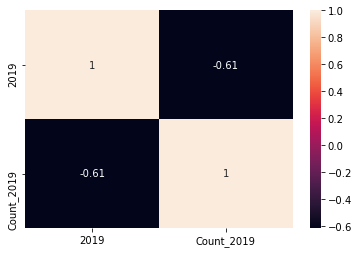

In [248]:
sn.heatmap(matrix1, annot=True)
plt.show()

In [258]:
cor2= corr_1.loc[:,['2020','Count_2020']]
matrix2 = cor2.corr()
matrix2

,2020,Count_2020
2020,1.000000,-0.725872
Count_2020,-0.725872,1.000000


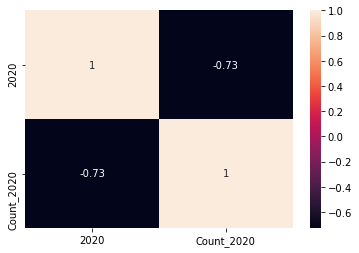

In [250]:
sn.heatmap(matrix2, annot=True)
plt.show()

In [242]:
cor3= corr_1.loc[:,['2021','Count_2021']]
matrix3 = cor3.corr()
matrix3

,2021,Count_2021
2021,1.000000,-0.905226
Count_2021,-0.905226,1.000000


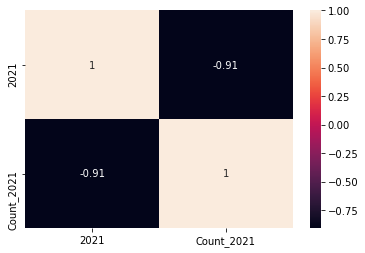

In [251]:
sn.heatmap(matrix3, annot=True)
plt.show()

In [243]:
cor4= corr_2.loc[:,['2019','Count_2019']]
matrix4 = cor4.corr()
matrix4

,2019,Count_2019
2019,1.00000,-0.61629
Count_2019,-0.61629,1.00000


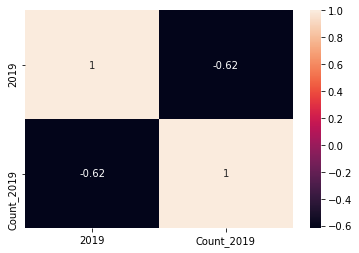

In [253]:
sn.heatmap(matrix4, annot=True)
plt.show()

In [246]:
cor5= corr_2.loc[:,['2020','Count_2020']]
matrix5 = cor5.corr()
matrix5

,2020,Count_2020
2020,1.000000,-0.960459
Count_2020,-0.960459,1.000000


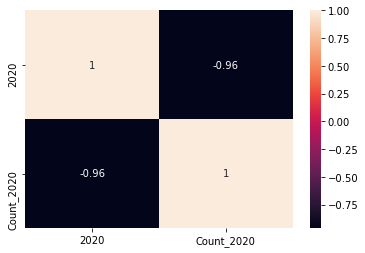

In [254]:
sn.heatmap(matrix5, annot=True)
plt.show()

In [245]:
cor6= corr_2.loc[:,['2021','Count_2021']]
matrix6 = cor6.corr()
matrix6

,2021,Count_2021
2021,1.000000,-0.725093
Count_2021,-0.725093,1.000000


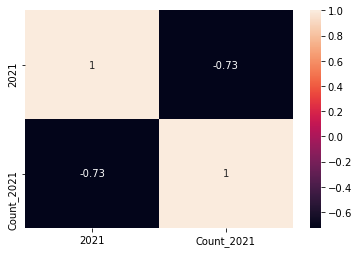

In [255]:
sn.heatmap(matrix6, annot=True)
plt.show()